# Carbon FIxation gene analysis from CR17 dataset
### Annotated using the *mi-faser* tool against the GS+ database corrected for the 2-Oxoglutarate:ferredoxin oxidoreductase

In [2]:
import cairocffi as cairo

print("Cairo version:", cairo.cairo_version())


OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': dlopen(libcairo.so.2, 0x0002): tried: 'libcairo.so.2' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibcairo.so.2' (no such file), '/Users/benoitdepins/miniconda3/lib/python3.11/site-packages/../../libcairo.so.2' (no such file), '/Users/benoitdepins/miniconda3/bin/../lib/libcairo.so.2' (no such file), '/usr/lib/libcairo.so.2' (no such file, not in dyld cache), 'libcairo.so.2' (no such file), '/usr/local/lib/libcairo.so.2' (no such file), '/usr/lib/libcairo.so.2' (no such file, not in dyld cache).  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo.so.2'
cannot load library 'libcairo.2.dylib': dlopen(libcairo.2.dylib, 0x0002): tried: 'libcairo.2.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibcairo.2.dylib' (no such file), '/Users/benoitdepins/miniconda3/lib/python3.11/site-packages/../../libcairo.2.dylib' (no such file), '/Users/benoitdepins/miniconda3/bin/../lib/libcairo.2.dylib' (no such file), '/usr/lib/libcairo.2.dylib' (no such file, not in dyld cache), 'libcairo.2.dylib' (no such file), '/usr/local/lib/libcairo.2.dylib' (no such file), '/usr/lib/libcairo.2.dylib' (no such file, not in dyld cache).  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo.2.dylib'
cannot load library 'libcairo-2.dll': dlopen(libcairo-2.dll, 0x0002): tried: 'libcairo-2.dll' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibcairo-2.dll' (no such file), '/Users/benoitdepins/miniconda3/lib/python3.11/site-packages/../../libcairo-2.dll' (no such file), '/Users/benoitdepins/miniconda3/bin/../lib/libcairo-2.dll' (no such file), '/usr/lib/libcairo-2.dll' (no such file, not in dyld cache), 'libcairo-2.dll' (no such file), '/usr/local/lib/libcairo-2.dll' (no such file), '/usr/lib/libcairo-2.dll' (no such file, not in dyld cache).  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo-2.dll'

In [141]:
dataset = pd.read_csv("mifaser_dataset.csv")
dataset = dataset.iloc[:, 1:]  # Remove the first column
dataset.set_index("EC", inplace=True)
#dataset.iloc[:, 0] = dataset.iloc[:, 0].astype('category')

dataset_clean = dataset.drop(columns=['ARS', 'PFF', 'PFS', 'PGS', 'PGF', 'PLS'])

ecdata = dataset_clean


Normalization

In [142]:
col_sums = ecdata.sum(axis=0, skipna=True)
median_col_sums = np.median(col_sums)
ecdata_n = ecdata.apply(lambda x: (x / x.sum(skipna=True)) * median_col_sums, axis=0)


Select on carbon associated genes

In [143]:
ec_list = pd.read_csv("ec_list_carbon.csv", header=None).values.flatten()
dataset_carbon = ecdata_n.loc[ecdata_n.index.isin(ec_list)]

In [406]:
bac_cor_ig = Graph.Adjacency(cor_matrix.values)

# Simplify the graph
bac_cor_ig.simplify()

# Plot the graph
layout = bac_cor_ig.layout("fr")  # Fruchterman-Reingold layout
plot(bac_cor_ig, layout=layout, vertex_size=8, rescale=True)

AttributeError: Plotting not available; please install pycairo or cairocffi

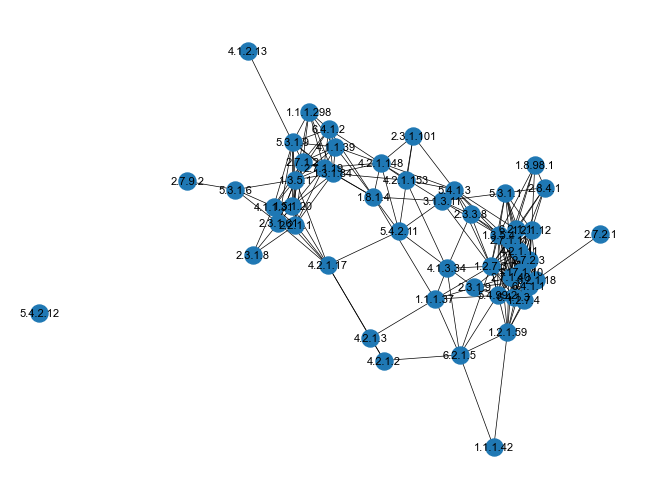

In [369]:
dataset_complete = dataset_carbon.dropna(axis=1, how='any') #because we have some missing data

cor_matrix = dataset_complete.T.corr(method='spearman')
cor_matrix[cor_matrix < 0.5] = 0
np.fill_diagonal(cor_matrix.values, 0) # to remove self-loops


labels = {i: cor_matrix.index[i] for i in range(len(cor_matrix.index))}


G = nx.from_numpy_array(cor_matrix.values, create_using=nx.Graph)



pos = nx.spring_layout(G, seed=200)  #, k=0.15, iterations=50)

nx.draw(G, pos, labels=labels, with_labels=labels, node_size=150, width=0.5, font_size=8)

plt.show()


Network statistics

In [370]:

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
assortativity = nx.degree_assortativity_coefficient(G)

print(f'Number of edges: {num_edges}')
print(f'Number of nodes: {num_nodes}')
print(f'Assortativity coefficient: {assortativity}')

Number of edges: 241
Number of nodes: 52
Assortativity coefficient: 0.33515889164784257


Identify cliques using Louvain

Modularity: 0.4543212766724136


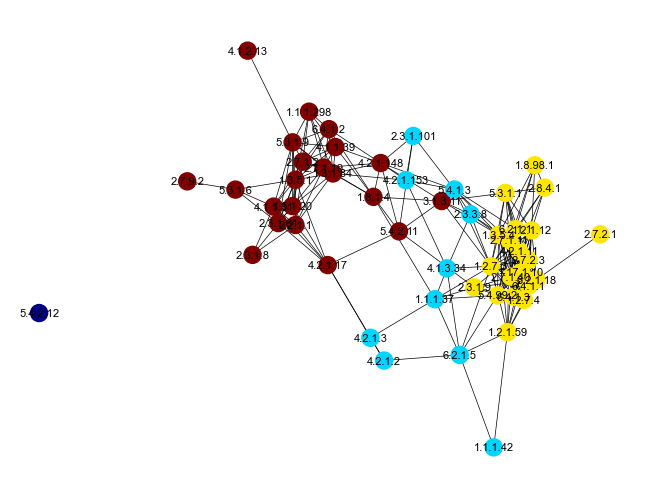

In [385]:
partition = community_louvain.best_partition(G)
modularity = community_louvain.modularity(partition, G)
print(f'Modularity: {modularity}')

# Add color based on community
colors = [partition[node] for node in G.nodes()]

# plot
pos = nx.spring_layout(G, seed=200)  # positions for all nodes

nx.draw(G, pos, node_color=colors, with_labels=True, labels=labels, node_size=150, width=0.5, font_size=8, cmap=plt.cm.jet)
plt.show()

Identify cliques using Greedy clustering

Modularity: 0.4241028177413346


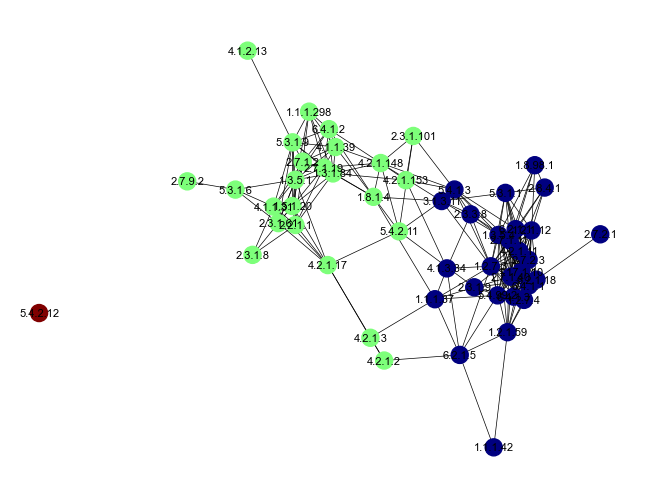

In [384]:
greedy_communities = community.greedy_modularity_communities(G)
greedy_partition = {node: i for i, comm in enumerate(greedy_communities) for node in comm}
modularity = community.modularity(G, greedy_communities)
print(f'Modularity: {modularity}')

# Add color based on community
colors = [greedy_partition[node] for node in G.nodes()]

# plot
pos = nx.spring_layout(G, seed=200)  # positions for all nodes

nx.draw(G, pos, node_color=colors, with_labels=labels, labels=labels, width=0.5, node_size=150, font_size=8, cmap=plt.cm.jet)
#nx.draw(G, pos, labels=labels, with_labels=labels, node_size=150, width=0.5, font_size=8)

#plt.savefig("carbon_greedy_network_cliques.svg", format='svg')
plt.show()

Modularity: 0.4175634028339732


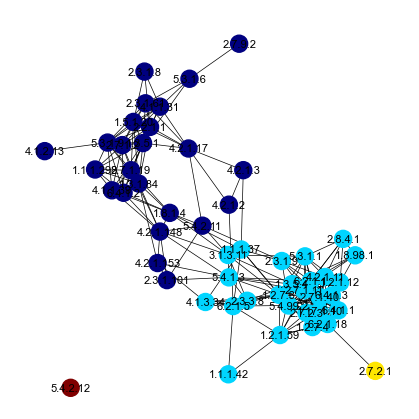

In [398]:

# Convert NetworkX graph to igraph graph
G_igraph = ig.Graph.from_networkx(G)

# Identify communities using Fast Greedy clustering
fast_greedy = G_igraph.community_fastgreedy()
# Get the community structure at the desired level
# The number of clusters (k) is chosen. Adjust as needed.
k = 4  # Number of desired communities (adjust as needed)
communities = fast_greedy.as_clustering(k)

# Compute modularity
modularity = G_igraph.modularity(communities)
print(f'Modularity: {modularity}')

# Map communities to colors
membership = communities.membership
colors = [membership[node] for node in G_igraph.vs.indices]

# Convert igraph layout to NetworkX format
layout = G_igraph.layout("fr")  # Fruchterman-Reingold layout

# Convert layout from igraph to NetworkX format
pos = {i: (layout[i][0], layout[i][1]) for i in range(len(layout))}

# Draw the graph using NetworkX with igraph layout
plt.figure(figsize=(4, 4))

nx.draw(G, pos, node_color=colors, with_labels=labels, labels=labels, width=0.5, node_size=150, font_size=8, cmap=plt.cm.jet)
#plt.savefig("carbon_network_cliques.svg", format='svg')
plt.show()


In [ ]:
# Importing all the mi-faser csv files as separate objects
temp = list.files(pattern="*.csv")
for (i in 1:length(temp)) assign(temp[i], read.csv(temp[i]))

In [ ]:
ls()

In [ ]:
mifaser<-ec_list.csv

In [ ]:
rm(i)

In [ ]:
ls()

In [ ]:
test <- merge(x=ec_list.csv,y=BQF_mifaser.csv[,c("ec","readcount")], by="ec",  all.x=TRUE)

In [ ]:
temp<-list(mifaser,ARS_mifaser.csv, BQF_mifaser.csv, BQS_mifaser.csv, BQS1_mifaser.csv,BR1F_mifaser.csv,BRF1_mifaser.csv,BRF2_mifaser.csv,BRS1_mifaser.csv,BRS2_mifaser.csv,CYF_mifaser.csv,CYS_mifaser.csv,EPF_mifaser.csv,EPS_mifaser.csv,ESF9_mifaser.csv,ETS_mifaser.csv,FAS_mifaser.csv,mifaser,MTF_mifaser.csv,PBS_mifaser.csv,PFF_mifaser.csv,PFS_mifaser.csv,PGF_mifaser.csv,PGS_mifaser.csv,PLS_mifaser.csv,QH2F_mifaser.csv,QHS1_mifaser.csv,QHS2_mifaser.csv,QNF_mifaser.csv,QNS_mifaser.csv,RSF_mifaser.csv,RSS_mifaser.csv,RVF_mifaser.csv,SIF_mifaser.csv,SIS_mifaser.csv,SLF_mifaser.csv,SLS_mifaser.csv,TCF_mifaser.csv,TCS_mifaser.csv)

In [ ]:
dataset <- join_all(temp, "ec")

In [ ]:
dataset

In [ ]:
# Selecting only the readcount data
dataset <- cbind (dataset[,1], dataset[ , grepl( "readcount" , names( dataset ) ) ])

In [ ]:
colnames(dataset)<-c('EC', 'ARS', 'BQF', 'BQS', 'BQS1', 'BR1F', 'BRF1', 'BRF2', 'BRS1', 'BRS2', 'CYF', 'CYS', 'EPF', 'EPS', 'ESF9', 'ETS', 'FAS', 'MTF', 'PBS', 'PFF', 'PFS', 'PGF', 'PGS', 'PLS', 'QH2F', 'QHS1', 'QHS2', 'QNF', 'QNS', 'RSF', 'RSS', 'RVF', 'SIF', 'SIS', 'SLF', 'SLS', 'TCF', 'TCS')

In [ ]:
dataset

In [ ]:
colnames(dataset)

In [ ]:
dataset_clean<-subset (dataset, select=-c(ARS,PFF,PFS,PGS,PGF,PLS))

In [ ]:
dataset_clean

In [ ]:
library(phyloseq)
library(microbiome)

In [ ]:
ecdata<-as.matrix(dataset_clean[,-1])

In [ ]:
row.names(ecdata)<-dataset_clean[,1]

In [ ]:
row.names(ecdata)

In [ ]:
ecdata <- phyloseq(otu_table(ecdata, taxa_are_rows = T))

In [ ]:
ecdata

In [ ]:
# Normalize counts to relative abundance first and then multiply for the median library abundance
ecdata_n <- transform_sample_counts(ecdata, function(x) ((x / sum(x, na.rm=T))*median(colSums(ecdata, na.rm=T))))

In [ ]:
median(colSums(ecdata, na.rm=T))

In [ ]:
ecdata_n

In [ ]:
# extract only the relevanc EC number for carbon metabolism
ec_list<-read.csv("ec_list_carbon.csv", header=F)

In [ ]:
ec_list<-as.matrix(ec_list)

In [ ]:
rownames(otu_table(ecdata_n))

In [ ]:
dataset_carbon <- subset(otu_table(ecdata_n), rownames(otu_table(ecdata_n)) %in% c(ec_list))

In [ ]:
dataset_carbon

In [ ]:
library(microbiome) # data analysis and visualisation
library(phyloseq) # also the basis of data object. Data analysis and visualisation
library(RColorBrewer) # nice color options
library(dplyr) # data handling
library(network) # networks
library(intergraph)  # networks
library(ggnet)   # network plotting with ggplot
library(igraph)  # networks
library(phyloseq) # ASV ecological analysis package
library(ggplot2) # plotting library
library(gridExtra) # gridding plots
library(ape) # importing and handling phylogenetic trees
library(ggthemes) # additional themes fro ggplot2
library(magrittr) #
library(rioja) # plotting poackages for tabular bubbleplots
library(ggpubr)
library(ggtern) # ternary plots for geochemistry
library(plyr)
library(coda.base)
library(tydiverse)
library(vegan) # Multivariate ecological analysis
library(propr)
library(missForest) # Imputing missing values in dataframes using Random Forests
library(VSURF) # Random Forests approach to variable importance identification
library(car) #for scatterplot

In [ ]:
ls()

In [ ]:
#Building the co-occurrence network
bac.cor <- cor(t(dataset_carbon),  use="complete.obs", method="spearman")   # use="complete.obs" because we have some missing data
bac.cor[bac.cor < 0.5] = 0
bac.cor.ig <- graph.adjacency(bac.cor, mode='undirected', add.rownames = TRUE, weighted = TRUE)
bac.cor.ig <- igraph::simplify(bac.cor.ig)
plot(bac.cor.ig, layout=layout_with_fr, vertex.size = 8, rescale=T)

In [ ]:
# Network statistics
ecount(bac.cor.ig)   
vcount(bac.cor.ig)
assortativity_degree(bac.cor.ig, directed=F)

In [ ]:
# Identify cliques using Louvain
bac.cor.louvain <- cluster_louvain(bac.cor.ig)
modularity(bac.cor.louvain)
V(bac.cor.ig)$color=bac.cor.louvain$membership

In [ ]:
plot(bac.cor.ig, layout=layout_with_fr, col = bac.cor.louvain, vertex.size = 8, rescale=T)

In [ ]:
# Identify cliques using Greedy clustering
bac.cor.greedy <- cluster_fast_greedy(bac.cor.ig)
modularity(bac.cor.greedy)
V(bac.cor.ig)$color=bac.cor.greedy$membership
plot(bac.cor.ig, layout=layout_with_fr, col = bac.cor.greedy, vertex.size = 8, rescale=T)

svg("carbon_netwrok_cliques.svg", height = 4, width=4)
plot(bac.cor.ig, layout=layout_with_fr, col = bac.cor.greedy, vertex.size = 8, rescale=T)
dev.off()

In [ ]:
# Identify cliques using Walk trap
bac.cor.walk <- cluster_walktrap(bac.cor.ig)
modularity(bac.cor.walk)
V(bac.cor.ig)$color=bac.cor.walk$membership
plot(bac.cor.ig, layout=layout_with_fr, col = bac.cor.walk, vertex.size = 8, rescale=T)

In [ ]:
sizes(bac.cor.louvain)
sizes(bac.cor.greedy)
sizes(bac.cor.walk)

## Testing Louvain cliques against the environmental parameters

In [ ]:
### Extracting the list of ASV for the main cliques identified by the Louvain function
V(bac.cor.ig)[bac.cor.louvain$membership == 1] -> bac.cor.group1
V(bac.cor.ig)[bac.cor.louvain$membership == 2] -> bac.cor.group2
V(bac.cor.ig)[bac.cor.louvain$membership == 3] -> bac.cor.group3
V(bac.cor.ig)[bac.cor.louvain$membership == 4] -> bac.cor.group4
V(bac.cor.ig)[bac.cor.louvain$membership == 5] -> bac.cor.group5

In [ ]:
bac.cor.group1
bac.cor.group2
bac.cor.group3
bac.cor.group4
bac.cor.group5

In [ ]:
#subset cliques
clique1 <- subset(dataset_carbon, rownames(otu_table(dataset_carbon)) %in% c(names(bac.cor.group1)))
clique2 <- subset(dataset_carbon, rownames(otu_table(dataset_carbon)) %in% c(names(bac.cor.group2)))
clique3 <- subset(dataset_carbon, rownames(otu_table(dataset_carbon)) %in% c(names(bac.cor.group3)))
clique4 <- subset(dataset_carbon, rownames(otu_table(dataset_carbon)) %in% c(names(bac.cor.group4)))
clique5 <- subset(dataset_carbon, rownames(otu_table(dataset_carbon)) %in% c(names(bac.cor.group5)))

In [ ]:
save.image()

In [ ]:
envdata<-read.csv("subductCR_final_dataset.csv", header=T)

In [ ]:
envdata[,1]

In [ ]:
colnames(clique1)

In [ ]:
colSums(clique4, na.rm=T)

In [ ]:
plot(envdata$dic, log(colSums(clique4, na.rm=T)))
cor.test(envdata$dic, colSums(clique4, na.rm=T), method = "spearman")

In [ ]:
## Test each clique abundance against environmental predictors using Person, Spearman and scatterplots
#Clique 1
par(mfrow=c(3,3))
for (i in 1:length(envdata)) {
    plot(envdata[,i], log(colSums(otu_table(clique1), na.rm=T)), xlab=colnames(envdata)[i])
}

message("Test with Pearson correlation:")
# Pearson
for (i in 16:length(envdata)) {
    a <- cor.test(envdata[,i], colSums(otu_table(clique1), na.rm=T))
       if (a$p.value<0.05) {
           print(paste(i,colnames(envdata)[i],a$estimate, a$parameter, a$p.value))
       }
}
message("Test with Spearman correlation:")
# Spearman
for (i in 16:length(envdata)) {
    a <- suppressWarnings(cor.test(envdata[,i], colSums(otu_table(clique1), na.rm=T), method = "spearman"))
       if (a$p.value<0.05) {
           print(paste(i,colnames(envdata)[i],a$estimate, a$parameter, a$p.value))
       }
}

In [ ]:
#Clique 2
par(mfrow=c(3,3))
for (i in 1:length(envdata)) {
    plot(envdata[,i], log(colSums(otu_table(clique2), na.rm=T)), xlab=colnames(envdata)[i])
}

message("Test with Pearson correlation:")
# Pearson
for (i in 16:length(envdata)) {
    a <- cor.test(envdata[,i], colSums(otu_table(clique2), na.rm=T))
       if (a$p.value<0.05) {
           print(paste(i,colnames(envdata)[i],a$estimate, a$parameter, a$p.value))
       }
}
message("Test with Spearman correlation:")
# Spearman
for (i in 16:length(envdata)) {
    a <- suppressWarnings(cor.test(envdata[,i], colSums(otu_table(clique2), na.rm=T), method = "spearman"))
       if (a$p.value<0.05) {
           print(paste(i,colnames(envdata)[i],a$estimate, a$parameter, a$p.value))
       }
}

In [ ]:
#Clique 4
par(mfrow=c(3,3))
for (i in 1:length(envdata)) {
    plot(envdata[,i], log(colSums(otu_table(clique4), na.rm=T)), xlab=colnames(envdata)[i])
}

message("Test with Pearson correlation:")
# Pearson
for (i in 16:length(envdata)) {
    a <- cor.test(envdata[,i], colSums(otu_table(clique4), na.rm=T))
       if (a$p.value<0.05) {
           print(paste(i,colnames(envdata)[i],a$estimate, a$parameter, a$p.value))
       }
}
message("Test with Spearman correlation:")
# Spearman
for (i in 16:length(envdata)) {
    a <- suppressWarnings(cor.test(envdata[,i], colSums(otu_table(clique4), na.rm=T), method = "spearman"))
       if (a$p.value<0.05) {
           print(paste(i,colnames(envdata)[i],a$estimate, a$parameter, a$p.value))
       }
}

In [ ]:
#Clique 5
par(mfrow=c(3,3))
for (i in 1:length(envdata)) {
    plot(envdata[,i], log(colSums(otu_table(clique5), na.rm=T)), xlab=colnames(envdata)[i])
}

message("Test with Pearson correlation:")
# Pearson
for (i in 16:length(envdata)) {
    a <- cor.test(envdata[,i], colSums(otu_table(clique5), na.rm=T))
       if (a$p.value<0.05) {
           print(paste(i,colnames(envdata)[i],a$estimate, a$parameter, a$p.value))
       }
}
message("Test with Spearman correlation:")
# Spearman
for (i in 16:length(envdata)) {
    a <- suppressWarnings(cor.test(envdata[,i], colSums(otu_table(clique5), na.rm=T), method = "spearman"))
       if (a$p.value<0.05) {
           print(paste(i,colnames(envdata)[i],a$estimate, a$parameter, a$p.value))
       }
}

## Testing Greedy cliques against the environmental parameters

In [ ]:
sizes(bac.cor.greedy)

In [ ]:
### Extracting the list of ASV for the main cliques identified by the Louvain function
V(bac.cor.ig)[bac.cor.greedy$membership == 1] -> bac.cor.gr.group1
V(bac.cor.ig)[bac.cor.greedy$membership == 2] -> bac.cor.gr.group2
V(bac.cor.ig)[bac.cor.greedy$membership == 3] -> bac.cor.gr.group3

In [ ]:
bac.cor.gr.group1
bac.cor.gr.group2
bac.cor.gr.group3

In [ ]:
#subset cliques
clique.gr1 <- subset(dataset_carbon, rownames(otu_table(dataset_carbon)) %in% c(names(bac.cor.gr.group1)))
clique.gr2 <- subset(dataset_carbon, rownames(otu_table(dataset_carbon)) %in% c(names(bac.cor.gr.group2)))
clique.gr3 <- subset(dataset_carbon, rownames(otu_table(dataset_carbon)) %in% c(names(bac.cor.gr.group3)))

In [ ]:
## Test each clique abundance against environmental predictors using Person, Spearman and scatterplots
#Clique 1
par(mfrow=c(3,3))
for (i in 1:length(envdata)) {
    plot(envdata[,i], log(colSums(otu_table(clique.gr1), na.rm=T)), xlab=colnames(envdata)[i])
}

message("Test with Pearson correlation:")
# Pearson
for (i in 16:length(envdata)) {
    a <- cor.test(envdata[,i], colSums(otu_table(clique.gr1), na.rm=T))
       if (a$p.value<0.05) {
           print(paste(i,colnames(envdata)[i],a$estimate, a$parameter, a$p.value))
       }
}
message("Test with Spearman correlation:")
# Spearman
for (i in 16:length(envdata)) {
    a <- suppressWarnings(cor.test(envdata[,i], colSums(otu_table(clique.gr1), na.rm=T), method = "spearman"))
       if (a$p.value<0.05) {
           print(paste(i,colnames(envdata)[i],a$estimate, a$parameter, a$p.value))
       }
}

In [ ]:
## Test each clique abundance against environmental predictors using Person, Spearman and scatterplots
#Clique 2
par(mfrow=c(3,3))
for (i in 1:length(envdata)) {
    plot(envdata[,i], log(colSums(otu_table(clique.gr2), na.rm=T)), xlab=colnames(envdata)[i])
}

message("Test with Pearson correlation:")
# Pearson
for (i in 16:length(envdata)) {
    a <- cor.test(envdata[,i], colSums(otu_table(clique.gr2), na.rm=T))
       if (a$p.value<0.05) {
           print(paste(i,colnames(envdata)[i],a$estimate, a$parameter, a$p.value))
       }
}
message("Test with Spearman correlation:")
# Spearman
for (i in 16:length(envdata)) {
    a <- suppressWarnings(cor.test(envdata[,i], colSums(otu_table(clique.gr2), na.rm=T), method = "spearman"))
       if (a$p.value<0.05) {
           print(paste(i,colnames(envdata)[i],a$estimate, a$parameter, a$p.value))
       }
}

In [ ]:
## Test each clique abundance against environmental predictors using Person, Spearman and scatterplots
#Clique 1
par(mfrow=c(3,3))
for (i in 1:length(envdata)) {
    plot(envdata[,i], log(colSums(otu_table(clique.gr3), na.rm=T)), xlab=colnames(envdata)[i])
}

message("Test with Pearson correlation:")
# Pearson
for (i in 16:length(envdata)) {
    a <- cor.test(envdata[,i], colSums(otu_table(clique.gr3), na.rm=T))
       if (a$p.value<0.05) {
           print(paste(i,colnames(envdata)[i],a$estimate, a$parameter, a$p.value))
       }
}
message("Test with Spearman correlation:")
# Spearman
for (i in 16:length(envdata)) {
    a <- suppressWarnings(cor.test(envdata[,i], colSums(otu_table(clique.gr3), na.rm=T), method = "spearman"))
       if (a$p.value<0.05) {
           print(paste(i,colnames(envdata)[i],a$estimate, a$parameter, a$p.value))
       }
}

In [ ]:
Louvain
1.1.1.37 1.1.1.42 4.1.3.34 4.2.1.2  4.2.1.3  6.2.1.5  

Greedy
1.1.1.37  1.1.1.42  2.3.1.101 2.3.3.8   3.1.3.11  4.1.3.34  4.2.1.153
4.2.1.17  4.2.1.2   4.2.1.3   5.4.1.3   5.4.2.11  6.2.1.5

In [ ]:
plot_data<-data.frame("clique2"=colSums(otu_table(clique.gr2), na.rm=T), "trench"=envdata$trench, "temp"=envdata$temp, "ph"=envdata$ph, "dic"=envdata$dic, 
                                        "dic_d13"=envdata$dic_d13, "doc"=envdata$doc, "doc_d13"=envdata$doc_d13)

In [ ]:
plot_data

In [ ]:
cor.test(plot_data$temp, plot_data$clique2)
cor.test(plot_data$temp, plot_data$clique2, method = "spearman")

In [ ]:
cor.test(plot_data$ph, plot_data$clique2)
cor.test(plot_data$ph, plot_data$clique2, method = "spearman")

In [ ]:
cor.test(plot_data$dic, plot_data$clique2)
cor.test(plot_data$dic, plot_data$clique2, method = "spearman")

In [ ]:
cor.test(plot_data$dic_d13, plot_data$clique2)
cor.test(plot_data$dic_d13, plot_data$clique2, method = "spearman")

In [ ]:
cor.test(plot_data$doc, plot_data$clique2)
cor.test(plot_data$doc, plot_data$clique2, method = "spearman")

In [ ]:
cor.test(plot_data$doc_d13, plot_data$clique2)
cor.test(plot_data$doc_d13, plot_data$clique2, method = "spearman")

In [ ]:
names(envdata)

In [ ]:
for (i in 11:length(envdata)) {
    a <- suppressWarnings(cor.test(envdata[,i], colSums(otu_table(clique.gr2), na.rm=T), method = "spearman"))
           print(paste(i,colnames(envdata)[i],a$estimate, a$parameter, a$p.value))
}

In [ ]:
ggplot(plot_data, aes(temp, log(clique2))) +
geom_jitter(aes(color=trench), size=3) +
geom_smooth(method = lm, se = F) +
theme_bw()

In [ ]:
ggplot(plot_data, aes(ph, log(clique2))) +
geom_jitter(aes(color=trench), size=3) +
geom_smooth(method = lm, se = F) +
theme_bw()

In [ ]:
ggplot(plot_data, aes(log(dic), log(clique2))) +
geom_jitter(aes(color=trench), size=3) +
geom_smooth(method = lm, formula= y~x, se = F) +
ylim(NA, 11) +
theme_bw()

ggsave("clique2_dic.svg", height = 4, width=5)

In [ ]:
ggplot(plot_data, aes(dic_d13, log(clique2))) +
geom_jitter(aes(color=trench), size=3) +
geom_smooth(method = lm, formula= y~x, se = F) +
ylim(NA, 11) +
theme_bw()

ggsave("clique2_dic_d13.svg", height = 4, width=5)

In [ ]:
ggplot(plot_data, aes(log(doc), log(clique2))) +
geom_jitter(aes(color=trench), size=3) +
geom_smooth(method = lm, formula= y~x, se = F) +
ylim(NA, 11) +
theme_bw()

ggsave("clique2_doc.svg", height = 4, width=5)

In [ ]:
ggplot(plot_data, aes(doc_d13, log(clique2))) +
geom_jitter(aes(color=trench), size=3) +
geom_smooth(method = lm, formula= y~x, se = F) +
ylim(NA, 11) +
theme_bw()

ggsave("clique2_doc_d13.svg", height = 4, width=5)

In [ ]:
save.image()

In [ ]:
load(".RData")

In [ ]:
library(missForest) # Imputing missing values in dataframes using Random Forests
library(VSURF) # Random Forests approach to variable importance identification


In [ ]:
envdata

In [ ]:
# Extract environmental predictor and remove non numeric variables (i.e. factors) and unwanted variables (air temperature)
envdata_rf <- data.frame(envdata[,10:74])
names(envdata_rf)

In [ ]:
# Contruct the vetors for each clique abundance response variable and normalize them as Z-scores
cliqueA <- scale(data.frame(colSums(otu_table(clique.gr1), na.rm = T)), center = TRUE, scale = TRUE)
cliqueB <- scale(data.frame(colSums(otu_table(clique.gr2), na.rm = T)), center = TRUE, scale = TRUE)
cliqueC <- scale(data.frame(colSums(otu_table(clique.gr3), na.rm = T)), center = TRUE, scale = TRUE)

In [ ]:
#Check if the predictors contain NAs
if (grep("NA", envdata_rf)!=0){
  print("There are NAs! Need to impute variables")
} else {
  print("No NAs in the predictors, good to go directly to the Random Forests")
} # The predictors dataset c ontains NAs

In [ ]:
# Impute missing data using a iterative random forest approach with the missForest package
envdata_rf2 <- missForest(envdata_rf, maxiter=10, variablewise = TRUE, verbose = TRUE, ntree=5000)
envdata_rf2$OOBerror
envdata_rf2$ximp # dataframe with imputed missing values to be used in downstrewam analysis

In [ ]:
# Run the the Random Forests model for variable selection using VSURF
cliqueA_RF <- VSURF(x = data.frame(envdata_rf2$ximp), y = cliqueA[,1], parallel=T, ntree=2000, mtry=23)
summary(cliqueA_RF)
plot(cliqueA_RF)
colnames(envdata_rf2$ximp)[cliqueA_RF$varselect.thres]
colnames(envdata_rf2$ximp)[cliqueA_RF$varselect.interp]

In [ ]:
# Repeat for each cliques
cliqueB_RF <- VSURF(x = data.frame(envdata_rf2$ximp), y = cliqueB[,1], parallel=T, ntree=5000, mtry=50)
plot(cliqueB_RF)
colnames(envdata_rf2$ximp)[cliqueB_RF$varselect.thres]
colnames(envdata_rf2$ximp)[cliqueB_RF$varselect.interp]

In [ ]:
cliqueC_RF <- VSURF(x = data.frame(envdata_rf2$ximp), y = cliqueC[,1], parallel=T, ntree=2000, mtry=23)
plot(cliqueC_RF)
colnames(envdata_rf2$ximp)[cliqueC_RF$varselect.thres]
colnames(envdata_rf2$ximp)[cliqueC_RF$varselect.interp]

In [ ]:
save.image() # Save all this good work!

## Extracting data file for the Nature Geoscience Publication

In [ ]:
#Figure 4a data file
write.csv(as.matrix(otu_table(dataset_carbon)), "figure4a_data.csv")

In [ ]:
write.csv(as.matrix(otu_table(clique2)), "figure42_data.csv")

In [ ]:
write.csv(plot_data, "figure4b_geochem_data.csv")